In [43]:
import pandas as pd
import numpy as np
import csv
from sklearn import preprocessing                  
import os
import matplotlib.pyplot as plt          #visualization
# from PIL import  Image
%matplotlib inline
import seaborn as sns                    #visualization
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from imblearn.pipeline import make_pipeline as imb_make_pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.ensemble import BalancedBaggingClassifier, EasyEnsemble
# from mlens.visualization import corrmat
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import Imputer, RobustScaler, FunctionTransformer
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.ensemble.partial_dependence import plot_partial_dependence
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (auc,roc_auc_score, confusion_matrix,
                             accuracy_score, roc_curve,
                             precision_recall_curve, f1_score)
from sklearn.pipeline import make_pipeline
import xgboost as xgb
from keras import models, layers, optimizers


In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv("train_binning.csv")
df_copy = pd.DataFrame.copy(df)

In [4]:
# df.dtypes

In [5]:
df=df.drop(['loan_id','financial_institution','origination_date','first_payment_date'], axis=1)

In [6]:
df.head()

,source,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,count_not_zero,sum_of_ms,max_of_ms
0,Z,4.250,214000,360,95,1,22,694,C86,30,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,1
1,Y,4.875,144000,360,72,1,44,697,B12,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1
2,Z,3.250,366000,180,49,1,33,780,B12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,X,4.750,135000,360,46,2,44,633,B12,0,638,0,0,0,0,0,0,0,0,0,1,1,1,1,1,4,4,1
4,X,4.750,124000,360,80,1,43,681,C86,0,0,0,0,1,2,3,4,5,6,7,8,9,10,11,1,11,66,11


In [7]:
# def origination_date(row):
#     return (int(row['origination_date'].split("/")[-2]))

# def first_payment_date(row):
#     tmp=row['first_payment_date'].split("-")[0]
#     if tmp == "Feb":
#         return 2
#     elif tmp == "Mar":
#         return 3
#     elif tmp == "Apr":
#         return 4
#     else:
#         return 5
    
# df['origination_date'] = df.apply (lambda row: origination_date(row), axis=1)
# df['first_payment_date'] = df.apply (lambda row: first_payment_date(row), axis=1)

In [8]:
df.head()

,source,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,count_not_zero,sum_of_ms,max_of_ms
0,Z,4.250,214000,360,95,1,22,694,C86,30,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,1
1,Y,4.875,144000,360,72,1,44,697,B12,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1
2,Z,3.250,366000,180,49,1,33,780,B12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,X,4.750,135000,360,46,2,44,633,B12,0,638,0,0,0,0,0,0,0,0,0,1,1,1,1,1,4,4,1
4,X,4.750,124000,360,80,1,43,681,C86,0,0,0,0,1,2,3,4,5,6,7,8,9,10,11,1,11,66,11


In [9]:
def changing_levels_source(row):
    if row['source'] == 'X':
        return 1
    elif row['source'] == 'Y':
        return 2
    else:
        return 3
    
def changing_levels_loanpurpose(row):
    if row['loan_purpose'] == 'A23':
        return 1
    elif row['loan_purpose'] == 'B12':
        return 2
    else:
        return 3
    
df['source'] = df.apply (lambda row: changing_levels_source(row), axis=1)
df['loan_purpose'] = df.apply (lambda row: changing_levels_loanpurpose(row), axis=1)  

In [10]:
df.head()

,source,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,count_not_zero,sum_of_ms,max_of_ms
0,3,4.250,214000,360,95,1,22,694,3,30,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,1
1,2,4.875,144000,360,72,1,44,697,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1
2,3,3.250,366000,180,49,1,33,780,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,1,4.750,135000,360,46,2,44,633,2,0,638,0,0,0,0,0,0,0,0,0,1,1,1,1,1,4,4,1
4,1,4.750,124000,360,80,1,43,681,3,0,0,0,0,1,2,3,4,5,6,7,8,9,10,11,1,11,66,11


In [11]:
interest_rate_bins = [0,2,4,6,8,10]
interest_rate_labels =[1,2,3,4,5]
df['interest_rate_binned'] = pd.cut(df['interest_rate'],interest_rate_bins,labels=interest_rate_labels)


loan_term_bins = [0, 60, 120,180,240,300,360]
loan_term_labels =[1,2,3,4,5,6]
df['loan_term_binned'] = pd.cut(df['loan_term'],loan_term_bins,labels=loan_term_labels)

loan_to_value_bins = [0,30,60,90,120]
loan_to_value_labels =[1,2,3,4]
df['loan_to_value_binned'] = pd.cut(df['loan_to_value'],loan_to_value_bins,labels=loan_to_value_labels)

debt_to_income_ratio_bins = [0,30,60,90]
debt_to_income_ratio_labels =[1,2,3]
df['debt_to_income_ratio_binned'] = pd.cut(df['debt_to_income_ratio'],debt_to_income_ratio_bins,labels=debt_to_income_ratio_labels)


borrower_credit_score_bins = [0,500,1000]
borrower_credit_score_labels =[1,2]
df['borrower_credit_score_binned'] = pd.cut(df['borrower_credit_score'],borrower_credit_score_bins,labels=borrower_credit_score_labels)


insurance_percent_bins = [-1,10.0,20.0,30.0,40.0]
insurance_percent_labels =[1,2,3,4]
df['insurance_percent_binned'] = pd.cut(df['insurance_percent'],insurance_percent_bins,labels=insurance_percent_labels)


co_borrower_credit_score_bins = [-1,200.0,400.0,600.0,800.0,1000.0]
co_borrower_credit_score_labels =[1,2,3,4,5]
df['co-borrower_credit_score_binned'] = pd.cut(df['co-borrower_credit_score'],co_borrower_credit_score_bins,labels=co_borrower_credit_score_labels)



In [12]:
df=df.drop(['interest_rate','loan_term','loan_to_value','debt_to_income_ratio','borrower_credit_score','insurance_percent','co-borrower_credit_score'], axis=1)

In [13]:
df.head()

,source,unpaid_principal_bal,number_of_borrowers,loan_purpose,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,count_not_zero,sum_of_ms,max_of_ms,interest_rate_binned,loan_term_binned,loan_to_value_binned,debt_to_income_ratio_binned,borrower_credit_score_binned,insurance_percent_binned,co-borrower_credit_score_binned
0,3,214000,1,3,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,1,3,6,4,1,2,3,1
1,2,144000,1,2,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,3,6,3,2,2,1,1
2,3,366000,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,3,2,2,2,1,1
3,1,135000,2,2,0,0,0,0,0,0,0,0,0,1,1,1,1,1,4,4,1,3,6,2,2,2,1,4
4,1,124000,1,3,0,0,1,2,3,4,5,6,7,8,9,10,11,1,11,66,11,3,6,3,2,2,1,1


In [14]:
# df.dtypes

In [15]:
df['source'] = pd.Categorical(df['source'])
# df['origination_date'] = pd.Categorical(df['origination_date'])
df['loan_purpose'] = pd.Categorical(df['loan_purpose'])
# df['first_payment_date'] = pd.Categorical(df['first_payment_date'])

In [16]:
# To create dummies
mylist = ['source','loan_purpose','interest_rate_binned','loan_term_binned',
         'loan_to_value_binned','debt_to_income_ratio_binned','borrower_credit_score_binned',
         'insurance_percent_binned','co-borrower_credit_score_binned']
ml_dummies = pd.get_dummies(df[mylist],prefix=mylist)
ml_dummies.head()

,source_1,source_2,source_3,loan_purpose_1,loan_purpose_2,loan_purpose_3,interest_rate_binned_1,interest_rate_binned_2,interest_rate_binned_3,interest_rate_binned_4,interest_rate_binned_5,loan_term_binned_1,loan_term_binned_2,loan_term_binned_3,loan_term_binned_4,loan_term_binned_5,loan_term_binned_6,loan_to_value_binned_1,loan_to_value_binned_2,loan_to_value_binned_3,loan_to_value_binned_4,debt_to_income_ratio_binned_1,debt_to_income_ratio_binned_2,debt_to_income_ratio_binned_3,borrower_credit_score_binned_1,borrower_credit_score_binned_2,insurance_percent_binned_1,insurance_percent_binned_2,insurance_percent_binned_3,insurance_percent_binned_4,co-borrower_credit_score_binned_1,co-borrower_credit_score_binned_2,co-borrower_credit_score_binned_3,co-borrower_credit_score_binned_4,co-borrower_credit_score_binned_5
0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0
1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0
2,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0
3,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0
4,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0


In [17]:
df=df.drop(['source','loan_purpose','interest_rate_binned','loan_term_binned',
         'loan_to_value_binned','debt_to_income_ratio_binned','borrower_credit_score_binned',
         'insurance_percent_binned','co-borrower_credit_score_binned'], axis=1)
temp = [df,ml_dummies]
temp_df = pd.concat(temp,axis=1)

In [18]:
temp_df.shape

(116058, 54)

In [19]:
# def show_correlations(df):
#     fig = plt.figure(figsize = (25,25))
#     corr = df.corr()
#     sns.heatmap(corr, 
#                 xticklabels=corr.columns.values,
#                 yticklabels=corr.columns.values,
#                 annot=True)
#     return corr

# correlation_df = show_correlations(df)

In [20]:
temp_df.head()

,unpaid_principal_bal,number_of_borrowers,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,count_not_zero,sum_of_ms,max_of_ms,source_1,source_2,source_3,loan_purpose_1,loan_purpose_2,loan_purpose_3,interest_rate_binned_1,interest_rate_binned_2,interest_rate_binned_3,interest_rate_binned_4,interest_rate_binned_5,loan_term_binned_1,loan_term_binned_2,loan_term_binned_3,loan_term_binned_4,loan_term_binned_5,loan_term_binned_6,loan_to_value_binned_1,loan_to_value_binned_2,loan_to_value_binned_3,loan_to_value_binned_4,debt_to_income_ratio_binned_1,debt_to_income_ratio_binned_2,debt_to_income_ratio_binned_3,borrower_credit_score_binned_1,borrower_credit_score_binned_2,insurance_percent_binned_1,insurance_percent_binned_2,insurance_percent_binned_3,insurance_percent_binned_4,co-borrower_credit_score_binned_1,co-borrower_credit_score_binned_2,co-borrower_credit_score_binned_3,co-borrower_credit_score_binned_4,co-borrower_credit_score_binned_5
0,214000,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0
1,144000,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0
2,366000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0
3,135000,2,0,0,0,0,0,0,0,0,0,1,1,1,1,1,4,4,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0
4,124000,1,0,0,1,2,3,4,5,6,7,8,9,10,11,1,11,66,11,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0


In [21]:
y = temp_df['m13']

In [22]:
temp_df=temp_df.drop(['m13'], axis=1)

In [23]:
labels = temp_df.columns

In [24]:
print(labels,len(labels))

Index(['unpaid_principal_bal', 'number_of_borrowers', 'insurance_type', 'm1',
       'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12',
       'count_not_zero', 'sum_of_ms', 'max_of_ms', 'source_1', 'source_2',
       'source_3', 'loan_purpose_1', 'loan_purpose_2', 'loan_purpose_3',
       'interest_rate_binned_1', 'interest_rate_binned_2',
       'interest_rate_binned_3', 'interest_rate_binned_4',
       'interest_rate_binned_5', 'loan_term_binned_1', 'loan_term_binned_2',
       'loan_term_binned_3', 'loan_term_binned_4', 'loan_term_binned_5',
       'loan_term_binned_6', 'loan_to_value_binned_1',
       'loan_to_value_binned_2', 'loan_to_value_binned_3',
       'loan_to_value_binned_4', 'debt_to_income_ratio_binned_1',
       'debt_to_income_ratio_binned_2', 'debt_to_income_ratio_binned_3',
       'borrower_credit_score_binned_1', 'borrower_credit_score_binned_2',
       'insurance_percent_binned_1', 'insurance_percent_binned_2',
       'insurance_percent_binned_3'

In [25]:
x=temp_df.values
y = y.astype(int)

In [26]:
from sklearn.preprocessing import RobustScaler
scaler  = RobustScaler()
scaler.fit(x)
x = scaler.transform(x)

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2 , random_state = 10)

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
rf_clf = RandomForestClassifier(n_estimators=500,max_features=0.25,criterion="entropy",class_weight="balanced")

In [36]:
resampled_rf = BalancedBaggingClassifier(base_estimator=rf_clf,
                                         n_estimators=10, random_state=123)
pip_resampled = make_pipeline(Imputer(strategy="mean"),
                              RobustScaler(), resampled_rf)

In [37]:
scores = cross_val_score(pip_resampled,
                         x_train, y_train,
                         scoring="roc_auc", cv=10)
print(f"EasyEnsemble model's average AUC: {scores.mean():.3f}")


EasyEnsemble model's average AUC: 0.859


In [39]:
pip_resampled.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('imputer',
                 Imputer(axis=0, copy=True, missing_values='NaN',
                         strategy='mean', verbose=0)),
                ('robustscaler',
                 RobustScaler(copy=True, quantile_range=(25.0, 75.0),
                              with_centering=True, with_scaling=True)),
                ('balancedbaggingclassifier',
                 BalancedBaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True,
                                                                                 class_weight='balanced'...
                                                                                 min_samples_split=2,
                                                                                 min_weight_fraction_leaf=0.0,
                                                                                 n_estimators=500,
                                                                                 n_jobs=Non

In [41]:
y_pred_en = pip_resampled.predict(x_test)

In [45]:
sum(y_pred_en)

1865

In [61]:
y_pred_en_test_set = pip_resampled.predict_proba(x)

In [83]:
tmp = [1 if i>0.89 else 0 for i in y_pred_en_test_set[:,1]]
print(sum(tmp))

201


In [84]:
np.savetxt("reset_foo_refresh_again_again_again.csv", tmp, delimiter=",")

In [100]:
model_xgb = xgb.XGBClassifier(n_estimators=200,objective="binary:logistic", random_state=42)

In [101]:
resampled_xgb = BalancedBaggingClassifier(base_estimator=model_xgb,
                                         n_estimators=10, random_state=123)
pip_resampled = make_pipeline(Imputer(strategy="mean"),
                              RobustScaler(), resampled_xgb)

In [102]:
pip_resampled.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('imputer',
                 Imputer(axis=0, copy=True, missing_values='NaN',
                         strategy='mean', verbose=0)),
                ('robustscaler',
                 RobustScaler(copy=True, quantile_range=(25.0, 75.0),
                              with_centering=True, with_scaling=True)),
                ('balancedbaggingclassifier',
                 BalancedBaggingClassifier(base_estimator=XGBClassifier(base_score=0.5,
                                                                        booster='gbtree',
                                                                        colsample_bylev...
                                                                        objective='binary:logistic',
                                                                        random_state=42,
                                                                        reg_alpha=0,
                                                                

In [103]:
y_pred_xgb = pip_resampled.predict_proba(x)

In [109]:
y_tmp_pred = pip_resampled.predict(x_test)

In [118]:
tmp_xgb = [1 if i>0.95 else 0 for i in y_pred_xgb[:,1]]
print(sum(tmp_xgb))

95


In [117]:
np.savetxt("reset_foo_refresh_again_again_again.csv", tmp_xgb, delimiter=",")

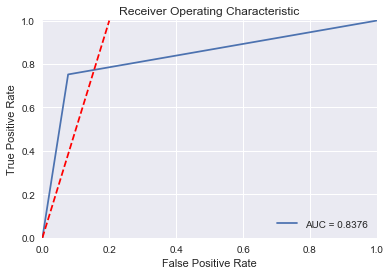

In [76]:
fpr, tpr, thresholds = roc_curve(y_test,y_pred_en)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,0.2],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();


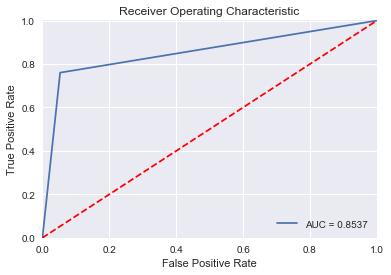

In [110]:
fpr, tpr, thresholds = roc_curve(y_test,y_tmp_pred)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();


In [ ]:
model = RandomForestClassifier(500,n_jobs=4,verbose=1,random_state=123)
model.fit(x_train,y_train)

In [ ]:
# for feature in zip(labels, model.feature_importances_):
#     print(feature)

In [ ]:
# from sklearn.feature_selection import SelectFromModel

In [ ]:
# sfm = SelectFromModel(model, threshold=0.15)

In [ ]:
# df.to_csv("testing_check.csv")

In [ ]:
y_pred_rf = model.predict(x_test)

In [ ]:
len(y_pred_rf),sum(y_pred_rf)

In [ ]:
# [[22749   151]
#  [ 7332   122]]

In [ ]:
confusion_matrix_randomforest = confusion_matrix(y_test,y_pred_rf)
print(confusion_matrix_randomforest)

In [ ]:
print(classification_report(y_test,y_pred_rf))

In [ ]:
accuracy_rf= accuracy_score(y_test,y_pred_rf)
print(accuracy_rf)

# Prediction on Test Set

In [46]:
df_test = pd.read_csv("test _binning.csv")

In [47]:
df_test.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,count_not_zero,sum_of_ms,max_of_ms
0,1,Y,Browning-Hart,3.875,417000,360,1/2/2012,12-Apr,75,1,20,790,A23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,X,OTHER,4.500,113000,360,1/2/2012,12-Apr,80,2,33,793,C86,0,784,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,Y,OTHER,4.500,72000,360,1/1/2012,12-Mar,75,1,34,710,C86,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,X,"Miller, Mcclure and Allen",4.125,123000,180,1/2/2012,12-Apr,41,2,24,798,A23,0,813,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,X,Browning-Hart,3.250,166000,180,1/2/2012,12-Apr,53,2,12,767,A23,0,768,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [48]:
df_test=df_test.drop(['loan_id','financial_institution'],axis = 1)

In [49]:
# def origination_date(row):
#     return (int(row['origination_date'].split("/")[-2]))

# def first_payment_date(row):
#     tmp=row['first_payment_date'].split("-")[0]
#     if tmp == "Feb":
#         return 2
#     elif tmp == "Mar":
#         return 3
#     elif tmp == "Apr":
#         return 4
#     else:
#         return 5
    
# df_test['origination_date'] = df_test.apply (lambda row: origination_date(row), axis=1)
# df_test['first_payment_date'] = df_test.apply (lambda row: first_payment_date(row), axis=1)

In [50]:
def changing_levels_source(row):
    if row['source'] == 'X':
        return 1
    elif row['source'] == 'Y':
        return 2
    else:
        return 3
    
def changing_levels_loanpurpose(row):
    if row['loan_purpose'] == 'A23':
        return 1
    elif row['loan_purpose'] == 'B12':
        return 2
    else:
        return 3
    
df_test['source'] = df_test.apply (lambda row: changing_levels_source(row), axis=1)
df_test['loan_purpose'] = df_test.apply (lambda row: changing_levels_loanpurpose(row), axis=1)  

In [51]:
interest_rate_bins = [0,2,4,6,8,10]
interest_rate_labels =[1,2,3,4,5]
df_test['interest_rate_binned'] = pd.cut(df_test['interest_rate'],interest_rate_bins,labels=interest_rate_labels)


loan_term_bins = [0, 60, 120,180,240,300,360]
loan_term_labels =[1,2,3,4,5,6]
df_test['loan_term_binned'] = pd.cut(df_test['loan_term'],loan_term_bins,labels=loan_term_labels)

loan_to_value_bins = [0,30,60,90,120]
loan_to_value_labels =[1,2,3,4]
df_test['loan_to_value_binned'] = pd.cut(df_test['loan_to_value'],loan_to_value_bins,labels=loan_to_value_labels)

debt_to_income_ratio_bins = [0,30,60,90]
debt_to_income_ratio_labels =[1,2,3]
df_test['debt_to_income_ratio_binned'] = pd.cut(df_test['debt_to_income_ratio'],debt_to_income_ratio_bins,labels=debt_to_income_ratio_labels)


borrower_credit_score_bins = [0,500,1000]
borrower_credit_score_labels =[1,2]
df_test['borrower_credit_score_binned'] = pd.cut(df_test['borrower_credit_score'],borrower_credit_score_bins,labels=borrower_credit_score_labels)


insurance_percent_bins = [-1,10.0,20.0,30.0,40.0]
insurance_percent_labels =[1,2,3,4]
df_test['insurance_percent_binned'] = pd.cut(df_test['insurance_percent'],insurance_percent_bins,labels=insurance_percent_labels)


co_borrower_credit_score_bins = [-1,200.0,400.0,600.0,800.0,1000.0]
co_borrower_credit_score_labels =[1,2,3,4,5]
df_test['co-borrower_credit_score_binned'] = pd.cut(df_test['co-borrower_credit_score'],co_borrower_credit_score_bins,labels=co_borrower_credit_score_labels)



In [52]:
df_test=df_test.drop(['interest_rate','loan_term','loan_to_value','debt_to_income_ratio','borrower_credit_score','insurance_percent','co-borrower_credit_score'], axis=1)

In [53]:
df_test['source'] = pd.Categorical(df_test['source'])
# df_test['origination_date'] = pd.Categorical(df_test['origination_date'])
df_test['loan_purpose'] = pd.Categorical(df_test['loan_purpose'])
# df_test['first_payment_date'] = pd.Categorical(df_test['first_payment_date'])

In [54]:
# To create dummies
mylist = ['source','loan_purpose','interest_rate_binned','loan_term_binned',
         'loan_to_value_binned','debt_to_income_ratio_binned','borrower_credit_score_binned',
         'insurance_percent_binned','co-borrower_credit_score_binned']
ml_dummies = pd.get_dummies(df_test[mylist],prefix=mylist)
ml_dummies.head()

,source_1,source_2,source_3,loan_purpose_1,loan_purpose_2,loan_purpose_3,interest_rate_binned_1,interest_rate_binned_2,interest_rate_binned_3,interest_rate_binned_4,interest_rate_binned_5,loan_term_binned_1,loan_term_binned_2,loan_term_binned_3,loan_term_binned_4,loan_term_binned_5,loan_term_binned_6,loan_to_value_binned_1,loan_to_value_binned_2,loan_to_value_binned_3,loan_to_value_binned_4,debt_to_income_ratio_binned_1,debt_to_income_ratio_binned_2,debt_to_income_ratio_binned_3,borrower_credit_score_binned_1,borrower_credit_score_binned_2,insurance_percent_binned_1,insurance_percent_binned_2,insurance_percent_binned_3,insurance_percent_binned_4,co-borrower_credit_score_binned_1,co-borrower_credit_score_binned_2,co-borrower_credit_score_binned_3,co-borrower_credit_score_binned_4,co-borrower_credit_score_binned_5
0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0
1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0
2,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0
3,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1
4,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0


In [55]:
df_test=df_test.drop(['source','origination_date','loan_purpose','first_payment_date','interest_rate_binned','loan_term_binned',
         'loan_to_value_binned','debt_to_income_ratio_binned','borrower_credit_score_binned',
         'insurance_percent_binned','co-borrower_credit_score_binned'], axis=1)
temp = [df_test,ml_dummies]
temp_df = pd.concat(temp,axis=1)

In [56]:
temp_df.head()

,unpaid_principal_bal,number_of_borrowers,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,count_not_zero,sum_of_ms,max_of_ms,source_1,source_2,source_3,loan_purpose_1,loan_purpose_2,loan_purpose_3,interest_rate_binned_1,interest_rate_binned_2,interest_rate_binned_3,interest_rate_binned_4,interest_rate_binned_5,loan_term_binned_1,loan_term_binned_2,loan_term_binned_3,loan_term_binned_4,loan_term_binned_5,loan_term_binned_6,loan_to_value_binned_1,loan_to_value_binned_2,loan_to_value_binned_3,loan_to_value_binned_4,debt_to_income_ratio_binned_1,debt_to_income_ratio_binned_2,debt_to_income_ratio_binned_3,borrower_credit_score_binned_1,borrower_credit_score_binned_2,insurance_percent_binned_1,insurance_percent_binned_2,insurance_percent_binned_3,insurance_percent_binned_4,co-borrower_credit_score_binned_1,co-borrower_credit_score_binned_2,co-borrower_credit_score_binned_3,co-borrower_credit_score_binned_4,co-borrower_credit_score_binned_5
0,417000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0
1,113000,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0
2,72000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0
3,123000,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1
4,166000,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0


In [57]:
len(temp_df.columns)

53

In [58]:
x=temp_df.values

In [ ]:
y_pred_testset = model.predict(x)

In [ ]:
len(y_pred_testset),sum(y_pred_testset)

In [ ]:
np.savetxt("reset_foo.csv", y_pred_testset, delimiter=",")

# NN

In [ ]:
from keras.utils import to_categorical

In [ ]:
y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

In [ ]:
y_train.shape

In [ ]:
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras.layers import Flatten
from keras.layers import Input
from keras.models import Model
from keras.optimizers import Adam

In [ ]:
def mlp_model(dim):
    model = Sequential()
    model.add(Dense(64,input_dim=dim,activation='relu'))
    model.add(BatchNormalization(axis=1))
    model.add(Dropout(0.3))
    model.add(Dense(128,activation='relu'))
    model.add(BatchNormalization(axis=1))
    model.add(Dropout(0.3))
    model.add(Dense(256,activation='relu'))
    model.add(BatchNormalization(axis=1))
    model.add(Dropout(0.3))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(32,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(8,activation='relu'))
    model.add(Dense(2,activation='softmax'))
    
    return model

In [ ]:
model = mlp_model(x_train.shape[1])
opt = Adam()
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

In [ ]:
hist = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,batch_size=1024,verbose=1)

In [ ]:
model.save(r"test_model_binning.h5")

In [ ]:
from keras.models import load_model

In [ ]:
model_test=load_model(r'test_model_binning.h5')

In [ ]:
y_pred_nn= model_test.predict(x)

In [ ]:
ytmp = np.argmax(y_pred_nn,axis=1)

In [ ]:
sum(ytmp)

In [ ]:
np.savetxt("foo_using_nn.csv", ytmp, delimiter=",")

# End of prediction

# XGBoost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgboost_model = XGBClassifier()
xgboost_model.fit(x_train, y_train)

In [ ]:
y_pred_xgboost = xgboost_model.predict(x_test)

In [ ]:
len(y_pred_xgboost),sum(y_pred_xgboost)

In [ ]:
confusion_matrix_xgboost = confusion_matrix(y_test,y_pred_xgboost)
print(confusion_matrix_xgboost)

In [ ]:
accuracy_xgboost = accuracy_score(y_test,y_pred_xgboost)
print(accuracy_xgboost)

# Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier,ExtraTreesClassifier
model = BaggingClassifier(base_estimator=ExtraTreesClassifier())
model.fit(x_train,y_train)

In [ ]:
y_pred_bag = model.predict(x_test)

In [ ]:
accuracy_bag = accuracy_score(y_test,y_pred_bag)
print(accuracy_bag)

In [ ]:
# types = []
# for i in range(y_pred_bag.shape[0]):
#     types.append(type(y_pred_bag[i]))
# print(set(types))

In [ ]:
from sklearn import svm

svm_model = svm.SVC(kernel='rbf',C=1.0,gamma=0.1)
svm_model.fit(x_train,y_train)

In [ ]:
y_pred_svm = svm_model.predict(x_test)

In [ ]:
accuracy_svm = accuracy_score(y_test,y_pred_svm)
print(accuracy_svm)

In [ ]:
df.head()

In [ ]:
df=df.drop(['F21','F22'], axis=1)

In [ ]:
df.shape

In [ ]:
labels_aftervif = df.columns
x=df.values[:,:18]
y =df.values[:,18]
y = y.astype(int)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3 , random_state = 10)

In [ ]:
from xgboost import XGBClassifier
xgboost_model = XGBClassifier()
xgboost_model.fit(x_train, y_train)

In [ ]:
y_pred_aftervif = xgboost_model.predict(x_test)

In [ ]:
len(y_pred_aftervif),sum(y_pred_aftervif)

In [ ]:
confusion_matrix_aftervif = confusion_matrix(y_test,y_pred_aftervif)
print(confusion_matrix_aftervif)

In [ ]:
accuracy_aftervif = accuracy_score(y_test,y_pred_aftervif)
print(accuracy_aftervif)

In [ ]:
df.shape

In [ ]:
def show_correlations(df):
    fig = plt.figure(figsize = (25,25))
    corr = df.corr()
    sns.heatmap(corr, 
                xticklabels=corr.columns.values,
                yticklabels=corr.columns.values,
                annot=True)
    return corr

correlation_df = show_correlations(df)

In [ ]:
(2*0.192*0.9507)/(0.192+0.9507)

In [ ]:
135/700